In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Value Function Iteration

### construct functions in need

In [2]:
def gridmaker(start, end, N):
    '''
    input: starting point, end point, # of grids
    output: list of grid points between starting point & end point
    '''
    step = float((end - start)/(N-1))
    target = [start]
    
    for i in range(1,N):
        target.append(start+i*step)
    
    return target

In [42]:
def supnorm(V_old, V_new):
    """
    input: previous value list, updated value list
    output: supnorm
    """
    dist_list = [abs(V_old[i]-V_new[i]) for i in range(len(V_old))]
    distance = max(dist_list)
    return distance

In [138]:
def utility(K, K_prime):
    '''
    input: today and tmr's K
    output: today's utility
    '''
    consumption = A*(K**alpha) + (1-delta)*K - K_prime
    utility = ((consumption**(1-gamma))-1)/(1-gamma)
    
    return utility

In [142]:
### this function will be used in approximating the value function
### since it has its own logic, I split it from the value_function
def reward_matrix(grid, reward_matrix):   
    '''
    input: grid
    output: reward_matrix
            ij component -> utility with K_i and K_prime_j
    '''
    for K in grid:
        K_row = []
        feasible_limit = (1-delta)*K + A*(K**alpha)        
        
        for K_prime in grid:
            if K_prime > feasible_limit:
                K_row.append(-10000)
            else:
                K_row.append(utility(K, K_prime))  ### used defined function "utility"
            
        reward_matrix.append(K_row)        
        
    return reward_matrix

In [133]:
def value_function(grid, threshold):
    '''
    input: reward_matrix
    output: 1. (Dict) Value Function that Spits out Maximized Value under State Variable K
            2. (Dict) Policy Function that Spits out K_prime := argmax(V(K))
    '''
    
    matrix = reward_matrix(grid, [])
    V_old = [0 for i in range(len(grid))]
    
    while True:
        V_new = []
        Policy_Dict = {}
        
        for i in range(len(grid)):
            # given K, calculate value for all the K_primes
            temp = [matrix[i][j] + beta*V_old[j] for j in range(len(grid))] 
            current_K = grid[i]
            argmax_K_prime = grid[temp.index(max(temp))]
            
            V_new.append(max(temp))
            Policy_Dict.update({current_K:argmax_K_prime})
            
        if supnorm(V_old, V_new) < threshold:
            break
            
        else:
            V_old = V_new
    
    Value_Dict = {}
    for i in range(len(grid)):
        Value_Dict.update({grid[i]:V_new[i]})
    
    return Value_Dict, Policy_Dict

## Question 1.3

### (0) set parameters

In [109]:
delta = float(0.05)
beta = float(0.98)
alpha = float(1/3)
gamma = float(2)
A = float(1)

### (1) grid & threshold setting

In [139]:
steady_K = (alpha*A/((1/beta)-1+delta))**(1/(1-alpha))

In [159]:
grid_30 = gridmaker(0.95*steady_K, 1.05*steady_K, 30)
grid_100 = gridmaker(0.95*steady_K, 1.05*steady_K, 100)
grid_300 = gridmaker(0.95*steady_K, 1.05*steady_K, 300)

threshold_weak = 0.0001
threshold_strong = 0.000001

In [160]:
value_30, policy_30 = value_function(grid_30, threshold_weak)
value_100, policy_100 = value_function(grid_100, threshold_weak)
value_300, policy_300 = value_function(grid_300, threshold_weak)

<function matplotlib.pyplot.show(close=None, block=None)>

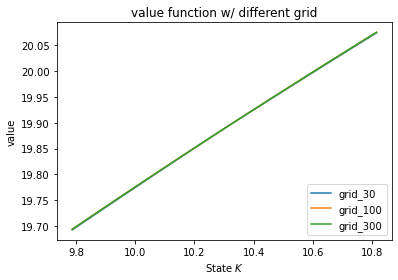

In [167]:
fig, ax = plt.subplots()                          # define plot

ax.plot(value_30.keys(), value_30.values(), label = 'grid_30')
ax.plot(value_100.keys(), value_100.values(), label = 'grid_100')
ax.plot(value_300.keys(), value_300.values(), label = 'grid_300')

ax.set_title('value function w/ different grid')
ax.set(xlabel='State $K$',ylabel='value')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

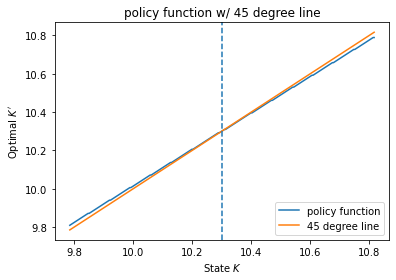

In [182]:
fig, ax = plt.subplots()                          # define plot

ax.plot(policy_300.keys(), policy_300.values(), label = 'policy function')
ax.plot(policy_300.keys(), policy_300.keys(), label = '45 degree line')

plt.axvline(x=steady_K, linestyle = 'dashed')

ax.set_title('policy function w/ 45 degree line')
ax.set(xlabel='State $K$',ylabel='Optimal $K^\prime$')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

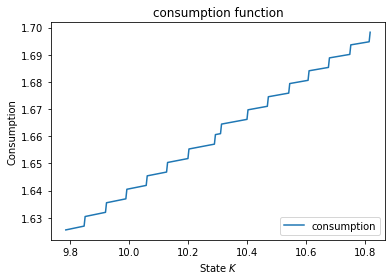

In [199]:
consumption = []
for i in range(len(grid_300)):
    K = grid_300[i]
    temp_list = list(policy_300.values())
    K_prime = temp_list[i]
    
    temp = A*(K**alpha) + (1-delta)*K - K_prime
    consumption.append(temp)

fig, ax = plt.subplots()  
ax.plot(grid_300, consumption, label = 'consumption')

ax.set_title('consumption function')
ax.set(xlabel='State $K$',ylabel='Consumption')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

## Question 1.4

In [200]:
grid2_300 = gridmaker(0.1*steady_K, 2*steady_K, 300)
grid2_500 = gridmaker(0.1*steady_K, 2*steady_K, 500)

value2_300, policy2_300 = value_function(grid2_300, threshold_weak)
value2_500, policy2_500 = value_function(grid2_500, threshold_weak)

In [206]:
grid2_3000 = gridmaker(0.1*steady_K, 2*steady_K, 3000)
value2_3000, policy2_3000 = value_function(grid2_3000, threshold_weak)

<function matplotlib.pyplot.show(close=None, block=None)>

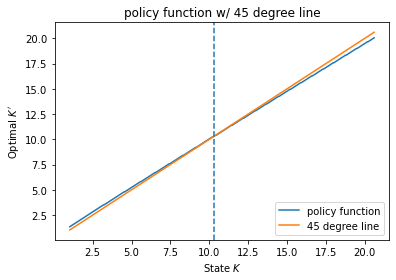

In [204]:
fig, ax = plt.subplots()                          # define plot

ax.plot(policy2_500.keys(), policy2_500.values(), label = 'policy function')
ax.plot(policy2_500.keys(), policy2_500.keys(), label = '45 degree line')

plt.axvline(x=steady_K, linestyle = 'dashed')

ax.set_title('policy function w/ 45 degree line')
ax.set(xlabel='State $K$',ylabel='Optimal $K^\prime$')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show


In [388]:
policy2_500

{1.030109981405563: 1.3438909777455341,
 1.0693326059480595: 1.3831136022880304,
 1.1085552304905557: 1.4223362268305269,
 1.1477778550330522: 1.4615588513730233,
 1.1870004795755484: 1.5007814759155196,
 1.226223104118045: 1.5400041004580158,
 1.2654457286605414: 1.5792267250005123,
 1.3046683532030376: 1.6184493495430088,
 1.3438909777455341: 1.6576719740855053,
 1.3831136022880304: 1.6968945986280015,
 1.4223362268305269: 1.7361172231704978,
 1.4615588513730233: 1.7753398477129942,
 1.5007814759155196: 1.8145624722554907,
 1.5400041004580158: 1.8537850967979872,
 1.5792267250005123: 1.8930077213404835,
 1.6184493495430088: 1.9322303458829797,
 1.6576719740855053: 1.9714529704254762,
 1.6968945986280015: 2.0106755949679727,
 1.7361172231704978: 2.049898219510469,
 1.7753398477129942: 2.0891208440529656,
 1.8145624722554907: 2.128343468595462,
 1.8537850967979872: 2.167566093137958,
 1.8930077213404835: 2.2067887176804546,
 1.9322303458829797: 2.2460113422229506,
 1.9714529704254762: 

<function matplotlib.pyplot.show(close=None, block=None)>

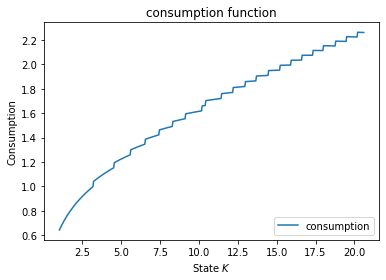

In [203]:
consumption2 = []
for i in range(len(grid2_500)):
    K = grid2_500[i]
    temp_list = list(policy2_500.values())
    K_prime = temp_list[i]
    
    temp = A*(K**alpha) + (1-delta)*K - K_prime
    consumption2.append(temp)

fig, ax = plt.subplots()  
ax.plot(grid2_500, consumption2, label = 'consumption')

ax.set_title('consumption function')
ax.set(xlabel='State $K$',ylabel='Consumption')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

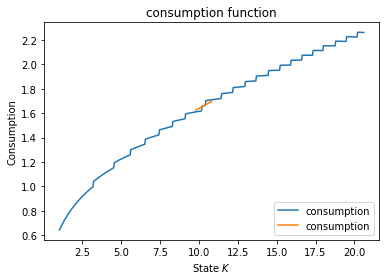

In [205]:
fig, ax = plt.subplots()  
ax.plot(grid2_500, consumption2, label = 'consumption')
ax.plot(grid_300, consumption, label = 'consumption')

ax.set_title('consumption function')
ax.set(xlabel='State $K$',ylabel='Consumption')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

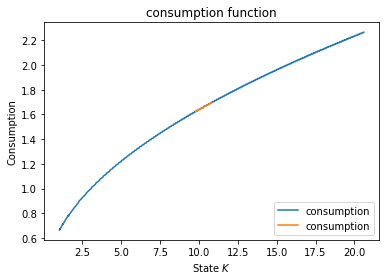

In [207]:
consumption2_3000 = []
for i in range(len(grid2_3000)):
    K = grid2_3000[i]
    temp_list = list(policy2_3000.values())
    K_prime = temp_list[i]
    
    temp = A*(K**alpha) + (1-delta)*K - K_prime
    consumption2_3000.append(temp)

fig, ax = plt.subplots()  
ax.plot(grid2_3000, consumption2_3000, label = 'consumption')
ax.plot(grid_300, consumption, label = 'consumption')

ax.set_title('consumption function')
ax.set(xlabel='State $K$',ylabel='Consumption')          # describe axes
ax.legend(loc='lower right')                      # display legend    

plt.show

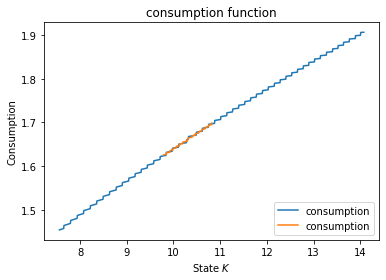

In [211]:
fig, ax = plt.subplots()  
ax.plot(grid2_3000[1000:2000], consumption2_3000[1000:2000], label = 'consumption')
ax.plot(grid_300, consumption, label = 'consumption')

ax.set_title('consumption function')
ax.set(xlabel='State $K$',ylabel='Consumption')          # describe axes
ax.legend(loc='lower right')                      # display legend    

## Question 1.5

---

# 2. Shooting

In [362]:
def TVC_value(K, K_prime, T):
    numerator = (beta**T) * K * (A*alpha*(K**(alpha-1)) + (1-delta))
    denominator = (A*(K**alpha) + (1-delta)*K - K_prime)**gamma
    
    return (numerator/(denominator+threshold_weak)).real

<b>Strategy</b> <br>
With the feasibility correspondence we can calculate the maximum value, say $\hat{K}$, that we can choose for $K_1$ under given $K_0$
1. guess $K_1$ with half point between $\hat{K}$ and $K_0$
2. verify with TVC condition
3. if it works, end the procedure
4. elif it doesn't work update $K_1$ with the half point of $K_0$ and $K_1$

<b>Before then!</b> <br>
Calculate the optimal level of Large T with the Caution of <b><i>Remark 2</i></b> <br>
: steady state $\bar{K}$ should satisfy TVC condition with large enough T

### Calculate Optimal Large T

In [417]:
T_list = [T for T in range(500)]
TVC_list = [TVC_value(steady_K, steady_K, T) for T in T_list]

TVC value with T is 500 : 0.00015952337591273403


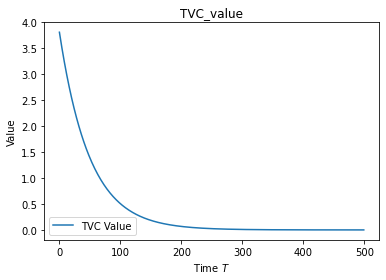

In [418]:
fig, ax = plt.subplots()  
ax.plot(T_list, TVC_list, label = 'TVC Value')

ax.set_title('TVC_value')
ax.set(xlabel='Time $T$',ylabel='Value')          # describe axes
ax.legend(loc='lower left')                      # display legend    

plt.show

print("TVC value with T is 500 :", TVC_list[-1])

observe that for T larger than 350, the TVC values get close to zero <br>
specifically, with T = 500, TVC value with steady state K is small enough <br>
so we will use T = 500

### Shooting Algorithm

In [389]:
K_hat

3.8172073823733905

In [383]:
K_t2(steady_K, steady_K)

10.301099814055629

In [382]:
def K_t2(K_t0, K_t1):
    '''
    input: K_t0 and K_t1
    output: K_t2 spitted out from the Euler Equation
    '''
    temp1 = (A*(K_t1**alpha) + (1-delta)*K_t1).real
    temp2 = ((beta*(A*alpha*(K_t1**(alpha-1))+(1-delta)))**(1/gamma)).real
    temp3 = (A*(K_t0**alpha) + (1-delta)*K_t0 - K_t1).real
    
    K_t2 = temp1 - temp2*temp3
    
    #return round(K_t2, 6)
    return K_t2

In [317]:
K_path

[2.5752749535139072,
 3.8172073823733905,
 5.189189652718788,
 6.66100699072848,
 8.209495952270018,
 9.816328938921814,
 11.466675348702346,
 13.148337908627866,
 14.851165284847298,
 16.566635123160392,
 18.287547542492383,
 20.00779322930886,
 21.722173706636283,
 23.42625919451451,
 25.116274256539075,
 26.789004445325045,
 28.44171912779402,
 30.07210699086657,
 31.678221635236476,
 33.25843530233221,
 34.81139923647524,
 36.33600951766554,
 37.83137744771642,
 39.296803758605385,
 40.7317560539326,
 42.1358490040944,
 43.50882690151097,
 44.850548249948105,
 46.16097211596064,
 47.440146013929144,
 48.68819513141695,
 49.90531273041073,
 51.09175158376654,
 52.247816325892764,
 53.373856613157514,
 54.470261003329114,
 55.537451475032654,
 56.57587851811818,
 57.58601673429405,
 58.568360894630395,
 59.523422406780206,
 60.45172615016312,
 61.35380764204086,
 62.2302105014931,
 63.08148418186786,
 63.90818194540696,
 64.71085905649568,
 65.49007117241042,
 66.24637291258182,
 66.

In [398]:
steady_K * 0.25

2.5752749535139072

In [402]:
(K_hat + steady_K*0.25)/2

3.196241167943649

In [421]:
# Set Large T
T = 700 

# Define given K_0
K_0 = 0.25 * steady_K

# Initial Guess
K_hat = (1-delta)*K_0 + A*(K_0**alpha)
K_1 = (K_hat + K_0)/2


while True:
    K_path = [K_0]
    K_path.append(K_1)
    
    for i in range(T-2):
        temp = K_t2(K_path[-2], K_path[-1])
        #temp = temp.real
        K_path.append(temp)
    
    temp_value = TVC_value(K_path[-2], K_path[-1], T)
    #temp_value = temp_value.real
    
    if temp_value.real < 0.000001:
        break
    
    else:
        K_1 = K_1 - 0.000000001 

KeyboardInterrupt: 

In [ ]:
K_path